In [ ]:
# Linear Regression 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/root1//LinearReg/Food-Truck-LineReg.csv",header=None)

In [3]:
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
### Graph for the Extracted Data Plotted 

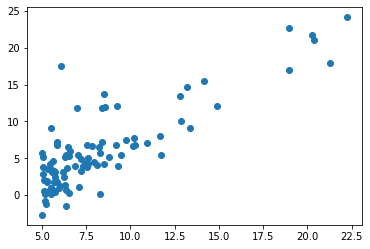

In [4]:
x,y=df[0],df[1]
plt.scatter(x,y,alpha=1)

In [ ]:
### HeatMap

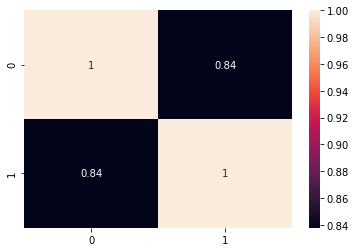

In [5]:
ax = sns.heatmap(df.corr(), annot=True)

In [6]:
df[1].corr(df[0])

0.837873232526341

In [7]:
df.columns=["x","y"]

In [ ]:
### To Calculate the x^2 and y^2

In [8]:
xsqr=[]
ysqr=[]
xy=[]

for i in range (len(df)):
    xsqr.append(round(df.x[i]**2,4))
    ysqr.append(round(df.y[i]**2,4))
    xy.append(round(df.x[i]*df.y[i],4))

df["x^2"]=xsqr
df["y^2"]=ysqr
df["xy"]=xy

In [9]:
df

,x,y,x^2,y^2,xy
0,6.1101,17.59200,37.3333,309.4785,107.4889
1,5.5277,9.13020,30.5555,83.3606,50.4690
2,8.5186,13.66200,72.5665,186.6502,116.3811
3,7.0032,11.85400,49.0448,140.5173,83.0159
4,5.8598,6.82330,34.3373,46.5574,39.9832
...,...,...,...,...,...
92,5.8707,7.20290,34.4651,51.8818,42.2861
93,5.3054,1.98690,28.1473,3.9478,10.5413
94,8.2934,0.14454,68.7805,0.0209,1.1987
95,13.3940,9.05510,179.3992,81.9948,121.2840


In [10]:
n=len(df)
print (n)

97


In [ ]:
#Standard Deviations 

In [11]:
def avg(lx):
    sum=0
    for it in lx:
        sum=sum+it
    return sum/len(lx)

In [12]:
def sdv(xcolo):
    temp=0
    for it in xcolo:
        temp = temp+(it-avg(xcolo))**2
        
    variance=temp/len(xcolo)
    sdv=(variance)**(1/2)
    return sdv

In [13]:
sdx=sdv(df['x'])

In [14]:
sdy=sdv(df['y'])

In [15]:
print (sdx)
print (sdy)

3.8498839959227156
5.48178525707763


In [16]:
def summation(sums):
    return avg(sums)*len(df)

In [17]:
xsqured=summation(df['x^2'])
ysqured=summation(df['y^2'])
xy=summation(df['xy'])

In [ ]:
###Regression coefficient

In [18]:
r=xy/(xsqured*ysqured)

In [19]:
r

0.0001289798537942054

In [ ]:
###Slope Calc

In [20]:
m= r * sdy/sdx

In [21]:
m

0.00018365225075298524

In [ ]:
#Linear Reg

In [22]:
#c=y-mx
c= avg(df['y'])-m*avg(df['x'])

In [23]:
c

5.8376364859106955

In [ ]:
###Y_pred

In [24]:
#y=mx+c
y_predict=m*df['x']+c

In [25]:
y_predict

0     5.838759
1     5.838652
2     5.839201
3     5.838923
4     5.838713
        ...   
92    5.838715
93    5.838611
94    5.839160
95    5.840096
96    5.838635
Name: x, Length: 97, dtype: float64

In [26]:
df['y_predict']=y_predict

In [27]:
df

,x,y,x^2,y^2,xy,y_predict
0,6.1101,17.59200,37.3333,309.4785,107.4889,5.838759
1,5.5277,9.13020,30.5555,83.3606,50.4690,5.838652
2,8.5186,13.66200,72.5665,186.6502,116.3811,5.839201
3,7.0032,11.85400,49.0448,140.5173,83.0159,5.838923
4,5.8598,6.82330,34.3373,46.5574,39.9832,5.838713
...,...,...,...,...,...,...
92,5.8707,7.20290,34.4651,51.8818,42.2861,5.838715
93,5.3054,1.98690,28.1473,3.9478,10.5413,5.838611
94,8.2934,0.14454,68.7805,0.0209,1.1987,5.839160
95,13.3940,9.05510,179.3992,81.9948,121.2840,5.840096


In [ ]:
#Gradient

In [28]:
l_rate=0.001

In [29]:
def grad_des(m, c):
    pred = []
    m_sum=0
    c_sum=0
    
    for X in x:
        pred.append(m * X + c)
        
    for i in range(len(df)):
        m_sum += df.x[i]*(df.y[i]-pred[i])
        c_sum += df.y[i]-pred[i]
        
    m_grad = (-2 / n) * m_sum
    c_grad = (-2 / n) * c_sum

    m -= (l_rate * m_grad)
    c -= (l_rate * c_grad)

    return m, c, pred

In [30]:

for _ in range(10000):
    m, c, y_predict = grad_des(m, c)
print (y_predict)

[3.496141277534441, 2.816827924672086, 6.305423918964699, 4.537856173553276, 3.2041905010553076, 6.147142974625032, 5.08979827275394, 6.374824922562416, 3.9348256044773184, 2.265002465813603, 3.0302797508633827, 12.89023779645292, 3.0574569505915634, 6.176886261881197, 2.948631511336657, 2.6438502972176097, 3.793924071122627, 2.3530659241602856, 3.8688071708028517, 4.616705044867658, 3.5882871478574594, 20.01229709002699, 2.7729711560120163, 3.74808441664548, 2.8602181319634314, 18.46681255612826, 11.331922824914274, 9.149582022707088, 11.73783121570428, 22.266954904386427, 2.4957170626476928, 4.055198437608148, 7.156431855517541, 3.2415154105532387, 5.946754866758013, 5.622844636521275, 5.8123851925654595, 2.90850723362638, 11.341254052288757, 3.779927230060902, 2.6759263913173945, 4.397071280540766, 10.02555099248667, 3.1037631664374348, 5.496056584570489, 4.642715841174027, 2.2831983591938454, 3.136072541221582, 10.016219765112186, 2.83304093223525, 5.16421481106544, 2.5602191718738

In [ ]:
#pred val

In [35]:
y_sub_y_predict=y-y_predict

In [36]:
y_sub_y_predict_sqr = y_sub_y_predict**2

In [37]:
df['y_sub_y_predict']=y_sub_y_predict
df['y_sub_y_predict_sqr']=y_sub_y_predict_sqr

In [38]:
df

,x,y,x^2,y^2,xy,y_predict,y_sub_y_predict,y_sub_y_predict_sqr
0,6.1101,17.59200,37.3333,309.4785,107.4889,5.838759,14.095859,198.693233
1,5.5277,9.13020,30.5555,83.3606,50.4690,5.838652,6.313372,39.858667
2,8.5186,13.66200,72.5665,186.6502,116.3811,5.839201,7.356576,54.119212
3,7.0032,11.85400,49.0448,140.5173,83.0159,5.838923,7.316144,53.525960
4,5.8598,6.82330,34.3373,46.5574,39.9832,5.838713,3.619109,13.097954
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,34.4651,51.8818,42.2861,5.838715,3.985996,15.888162
93,5.3054,1.98690,28.1473,3.9478,10.5413,5.838611,-0.570636,0.325626
94,8.2934,0.14454,68.7805,0.0209,1.1987,5.839160,-5.898210,34.788880
95,13.3940,9.05510,179.3992,81.9948,121.2840,5.840096,-2.937007,8.626011


In [ ]:
#SSE

In [39]:
SSE = summation(df['y_sub_y_predict_sqr'])

In [40]:
SSE

869.773490731888

In [ ]:
#SST

In [41]:
a=avg(df['y'])
SST=summation((y-a)**2)

In [49]:
SST

2914.8470516572247

In [ ]:
#SSR

In [51]:
SSR = summation((y_predict-avg(y_predict))**2)

In [52]:
SSR

1955.9808187353779

In [ ]:
####Square of Coefficent

In [53]:
rsqr = 1-(SSE/SST)

In [54]:
rsqr

0.7016057874332097

In [ ]:
#Plotting 

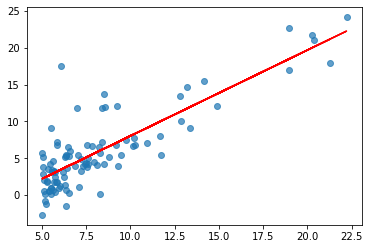

In [56]:
plt.scatter(x,y,alpha=0.7)
plt.plot(x,y_predict,color='red')